# Quantum Random Walk

## Imports

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from qiskit import *
from qiskit import IBMQ, Aer
from qiskit.quantum_info import Operator 
from qiskit import QuantumCircuit, execute
from qiskit.tools.visualization import plot_histogram, plot_bloch_vector
import qiskit.quantum_info as qi
from qiskit.tools.jupyter import *

## Circuit

### Increament Operator

In [2]:
n=4

In [3]:
def inc_op(n):
    circuit=QuantumCircuit(n,name='inc')
    qr=circuit.qubits
    for i in range(n-2):
        
        circuit.mcrx(np.pi,[*range(i+1,n)],i)
    circuit.cx(n-1,n-2)
    circuit.x(n-1)
    return circuit

In [4]:
inc_gate = inc_op(n).to_gate()

In [5]:
inc_gate.definition.draw()

┌───────────────────┐     ┌────────────────────┐     ┌───────────────────┐»
q_0: ┤ U(π/4,-π/2,π/2,0) ├─────┤ U(-π/4,-π/2,π/2,0) ├─────┤ U(π/4,-π/2,π/2,0) ├»
     └─────────┬─────────┘     └─────────┬──────────┘     └─────────┬─────────┘»
q_1: ──────────┼─────────────────────────┼──────────────────────────┼──────────»
               │          ┌───┐          │           ┌───┐          │          »
q_2: ──────────┼──────────┤ X ├──────────■───────────┤ X ├──────────■──────────»
               │          └─┬─┘                      └─┬─┘                     »
q_3: ──────────■────────────■──────────────────────────■───────────────────────»
                                                                               »
«          ┌────────────────────┐     ┌───────────────────┐     »
«q_0: ─────┤ U(-π/4,-π/2,π/2,0) ├─────┤ U(π/4,-π/2,π/2,0) ├─────»
«     ┌───┐└─────────┬──────────┘┌───┐└─────────┬─────────┘┌───┐»
«q_1: ┤ X ├──────────■───────────┤ X ├──────────■──────────┤ X ├»
«     └─┬─┘                      └─┬─┘                     └─┬─┘»
«q_2: ──■──────────────────────────┼─────────────────────────■──»
«                                  │                            »
«q_3: ─────────────────────────────■────────────────────────────»
«                                                               »
«     ┌────────────────────┐     ┌───────────────────┐                     »
«q_0: ┤ U(-π/4,-π/2,π/2,0) ├─────┤ U(π/4,-π/2,π/2,0) ├─────────────────────»
«     └─────────┬──────────┘┌───┐└─────────┬─────────┘┌───────────────────┐»
«q_1: ──────────■───────────┤ X ├──────────■──────────┤ U(π/2,-π/2,π/2,0) ├»
«                           └─┬─┘                     └─────────┬─────────┘»
«q_2: ────────────────────────┼─────────────────────────────────┼──────────»
«                             │                                 │          »
«q_3: ────────────────────────■─────────────────────────────────■──────────»
«                                                                          »
«                                                                    
«q_0: ───────────────────────────────────────────────────────────────
«          ┌────────────────────┐     ┌───────────────────┐          
«q_1: ─────┤ U(-π/2,-π/2,π/2,0) ├─────┤ U(π/2,-π/2,π/2,0) ├──────────
«     ┌───┐└─────────┬──────────┘┌───┐└─────────┬─────────┘┌───┐     
«q_2: ┤ X ├──────────■───────────┤ X ├──────────■──────────┤ X ├─────
«     └─┬─┘                      └─┬─┘                     └─┬─┘┌───┐
«q_3: ──■──────────────────────────■─────────────────────────■──┤ X ├
«                                                               └───┘

### Decreament Operator

In [6]:
def dec_op(n):
    circuit=QuantumCircuit(n,name='dec')
    qr=circuit.qubits
    circuit.x(n-1)
    circuit.cx(n-1,n-2)
    for i in range(n-3,-1,-1):
        circuit.mcrx(np.pi,[*range(i+1,n)],i)
    
    return circuit

In [7]:
dec_gate = dec_op(n).to_gate() 

In [8]:
dec_gate.definition.draw()

»
q_0: ───────────────────────────────────────────────────────────────»
               ┌───────────────────┐     ┌────────────────────┐     »
q_1: ──────────┤ U(π/2,-π/2,π/2,0) ├─────┤ U(-π/2,-π/2,π/2,0) ├─────»
          ┌───┐└─────────┬─────────┘┌───┐└─────────┬──────────┘┌───┐»
q_2: ─────┤ X ├──────────┼──────────┤ X ├──────────■───────────┤ X ├»
     ┌───┐└─┬─┘          │          └─┬─┘                      └─┬─┘»
q_3: ┤ X ├──■────────────■────────────■──────────────────────────■──»
     └───┘                                                          »
«                          ┌───────────────────┐     ┌────────────────────┐»
«q_0: ─────────────────────┤ U(π/4,-π/2,π/2,0) ├─────┤ U(-π/4,-π/2,π/2,0) ├»
«     ┌───────────────────┐└─────────┬─────────┘     └─────────┬──────────┘»
«q_1: ┤ U(π/2,-π/2,π/2,0) ├──────────┼─────────────────────────┼───────────»
«     └─────────┬─────────┘          │          ┌───┐          │           »
«q_2: ──────────■────────────────────┼──────────┤ X ├──────────■───────────»
«                                    │          └─┬─┘                      »
«q_3: ───────────────────────────────■────────────■────────────────────────»
«                                                                          »
«          ┌───────────────────┐     ┌────────────────────┐     »
«q_0: ─────┤ U(π/4,-π/2,π/2,0) ├─────┤ U(-π/4,-π/2,π/2,0) ├─────»
«          └─────────┬─────────┘┌───┐└─────────┬──────────┘┌───┐»
«q_1: ───────────────┼──────────┤ X ├──────────■───────────┤ X ├»
«     ┌───┐          │          └─┬─┘                      └─┬─┘»
«q_2: ┤ X ├──────────■────────────■──────────────────────────┼──»
«     └─┬─┘                                                  │  »
«q_3: ──■────────────────────────────────────────────────────■──»
«                                                               »
«     ┌───────────────────┐     ┌────────────────────┐     »
«q_0: ┤ U(π/4,-π/2,π/2,0) ├─────┤ U(-π/4,-π/2,π/2,0) ├─────»
«     └─────────┬─────────┘┌───┐└─────────┬──────────┘┌───┐»
«q_1: ──────────■──────────┤ X ├──────────■───────────┤ X ├»
«                          └─┬─┘                      └─┬─┘»
«q_2: ───────────────────────■──────────────────────────┼──»
«                                                       │  »
«q_3: ──────────────────────────────────────────────────■──»
«                                                          »
«     ┌───────────────────┐
«q_0: ┤ U(π/4,-π/2,π/2,0) ├
«     └─────────┬─────────┘
«q_1: ──────────■──────────
«                          
«q_2: ─────────────────────
«                          
«q_3: ─────────────────────
«

### Generating Walk

In [56]:
theta=2*np.pi/3

In [57]:
def generate_walk(n,times):
    circuit=QuantumCircuit(n,n)
    qr=circuit.qubits
    
    for i in range(times):
        
        circuit.rx(theta/4,n-1)
        circuit.append(inc_op(n),range(n))
        circuit.rx(theta/4,n-1)
        circuit.append(dec_op(n),range(n))
    circuit.measure(range(n),range(n))
    return circuit

In [58]:
n=4
times=10
circuit= generate_walk(n,times)

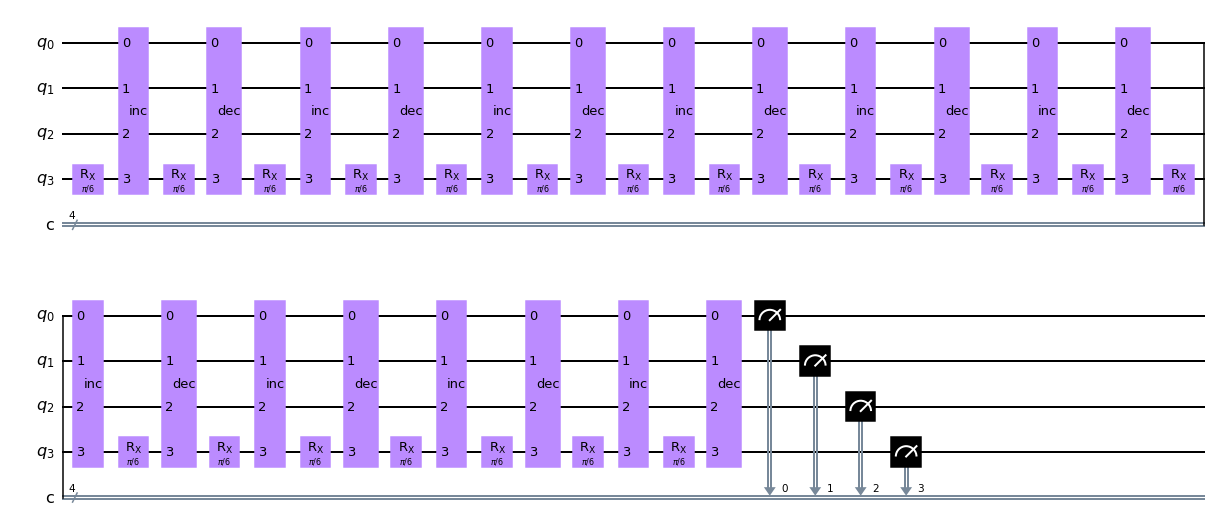

In [59]:
circuit.draw('mpl')

In [60]:
simulator=Aer.get_backend('statevector_simulator')
result=execute(circuit,backend=simulator).result()
sv=result.get_statevector()

In [61]:
backend=Aer.get_backend('qasm_simulator')
result=execute(circuit,backend,shots=5000).result()
counts=result.get_counts(circuit)

print(counts)
sortedcounts = []
sortedkeys = sorted(counts)
for i in sortedkeys:
    for j in counts:
        if(i == j):
            sortedcounts.append(counts.get(j))


{'1000': 2380, '0011': 1078, '0100': 610, '0010': 49, '1011': 430, '1111': 347, '1010': 33, '0001': 2, '1100': 11, '0110': 21, '1101': 22, '1001': 2, '0111': 1, '0000': 6, '0101': 7, '1110': 1}


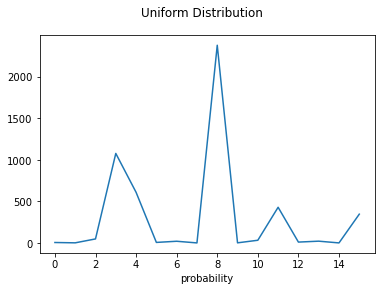

In [62]:
sortedcounts = []
sortedkeys = sorted(counts)

for i in sortedkeys:
    for j in counts:
        if(i == j):
            sortedcounts.append(counts.get(j))
plt.suptitle('Uniform Distribution')
plt.xlabel("probability")
plt.plot(sortedcounts)
plt.show()

## Plotting Histogram

### On classical computer

In [63]:
simulator=Aer.get_backend('qasm_simulator')

In [64]:
result=execute(circuit,backend=simulator).result()

In [65]:
from qiskit.tools.visualization import plot_histogram

In [66]:
counts=result.get_counts(circuit)

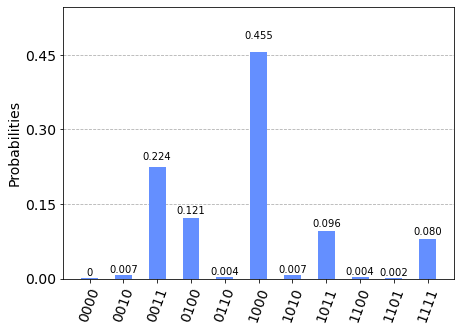

In [67]:
plot=plot_histogram(result.get_counts(circuit))
plot


### On real device


In [68]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-06-13 10:34:59,909: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [69]:
provider=IBMQ.get_provider('ibm-q')

In [70]:
qcomp= provider.get_backend('ibmq_qasm_simulator')

In [71]:
job=execute(circuit,backend=qcomp)

In [72]:
from qiskit.tools.monitor import job_monitor

In [73]:
job_monitor(job)

Job Status: job has successfully run


In [74]:
result=job.result()

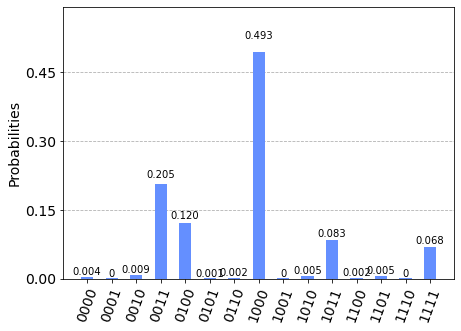

In [75]:
plot_histogram(result.get_counts(circuit))

## State city Plot

In [76]:
def generate_walk(n,times):
    qc_AB=QuantumCircuit(n,n)
    for i in range(times):
        
        qc_AB.rx(theta,n-1)
        qc_AB.append(inc_op(n),range(n))
        qc_AB.rx(theta,n-1)
        qc_AB.append(dec_op(n),range(n))
    return qc_AB

In [77]:
qc_AB= generate_walk(4,10)

In [78]:
psi_AB = qi.Statevector.from_instruction(qc_AB)
psi_AB.draw('latex', prefix='|\\psi_{AB}\\rangle = ')

<IPython.core.display.Latex object>

In [79]:
rho_AB = qi.DensityMatrix.from_instruction(qc_AB)
rho_AB.draw('latex', prefix='\\rho_{AB} = ')

<IPython.core.display.Latex object>

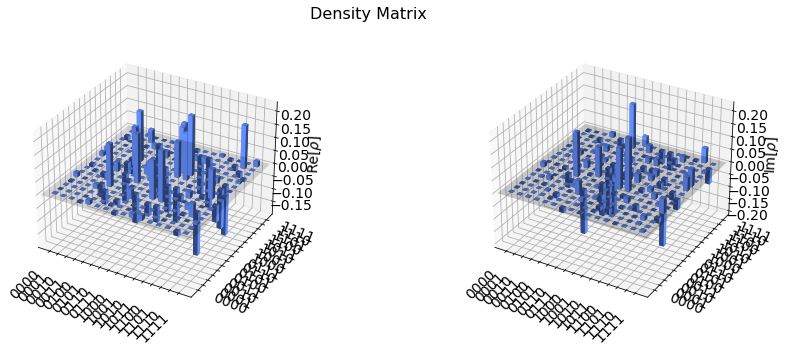

In [80]:
from qiskit.visualization import plot_state_city
plot_state_city(rho_AB.data, title='Density Matrix')